## TOPIC: Longitudinal Prediction of Cardiovascular Disease using Machine Learning

Cardiovascular Disease Prediction - Notes
 1. Introduction
- I'm working with a cardiovascular disease dataset to predict whether patients have heart disease
- The notebook demonstrates a complete machine learning pipeline from data exploration to model evaluation
- I use various visualization techniques and multiple ML algorithms to find the best approach

 2. Exploratory Data Analysis (EDA)

 2.1 Initial Data Overview
- Dataset contains 1000 records with 14 columns including patient demographics and medical measurements
- Key columns include age, gender, chest pain type, blood pressure, cholesterol, and other cardiac indicators
- Target variable indicates presence (1) or absence (0) of cardiovascular disease
- No missing values in the dataset, which is advantageous for our analysis

 2.2 Univariate Analysis

Let's examine the distribution of each feature:

Demographic Features:
- Age shows a roughly normal distribution, centered around 49 years
- Gender distribution shows approximately 76.5% male and 23.5% female patients

Clinical Features:
- Chest Pain Types: Shows four categories with varying distributions
- Resting Blood Pressure: Right-skewed distribution, majority between 120-180 mmHg
- Serum Cholesterol: Some outliers present, main distribution between 200-400 mg/dl
- Fasting Blood Sugar: Binary feature, about 30% have levels >120 mg/dl
- Resting ECG: Three categories with normal ECG being most common
- Maximum Heart Rate: Roughly normal distribution between 70-200 bpm
- Exercise Induced Angina: Nearly equal split between yes/no
- ST Depression (oldpeak): Right-skewed distribution
- Slope of ST Segment: Three categories with upsloping being most common
- Number of Major Vessels: Ranges from 0-3, with decreasing frequency

Target Variable:
- Slightly imbalanced dataset: 58% positive cases (with heart disease)
- This imbalance isn't severe enough to require special handling

 2.3 Bivariate Analysis
Key findings from feature relationships with target:

Strong Predictors:
- Age: Higher median age associated with positive cases
- Exercise Induced Angina: Strong correlation with disease presence
- ST Depression: Higher values more common in positive cases
- Number of Major Vessels: More vessels correlate with higher disease probability

Moderate Predictors:
- Chest Pain Type: Certain types more indicative of disease
- Maximum Heart Rate: Lower rates associated with disease
- Resting ECG: Some patterns more prevalent in positive cases

 2.4 Correlation Analysis
- Heatmap shows relationships between all variables
- Several strong correlations identified that could be useful for prediction
- Some features show multicollinearity, which might affect certain models

3.. Data Preprocessing

3.1 Data Cleaning
- Removed patient ID as it's not relevant for prediction
- Handled cholesterol outliers using median imputation
- Applied feature scaling using StandardScaler
- Split data into 80% training and 20% testing sets

4. Model Development and Evaluation

4.1 Traditional Machine Learning Models - 
I implemented Five Classical Models with Hyperparameter Tuning:

1. Logistic Regression:
   - Achieved 94% accuracy and AUC ROC 0.945
   - Well-balanced precision and recall
   - Simple but effective baseline model

2. Support Vector Machine (SVM):
   - Achieved 95% accuracy and AUC ROC 0.958
   - Excellent balance between precision and recall
   - Strong performance suggests good feature separation

3. K-Nearest Neighbors (KNN):
   - Achieved 94% accuracy and AUC ROC 0.935
   - Slightly lower performance than SVM
   - Good for this dataset due to clear feature relationships

4. Decision Tree:
   - Achieved 94% accuracy and AUC ROC 0.944
   - Comparable performance to other models
   - Provides interpretable decision rules
   
5. Random Forest:
   - Achieved 97% accuracy and AUC ROC 0.975
   - Robust performance, handles multicollinearity well
   - Outperformed all other models in predictive power
 
4.2 Neural Network Model
- Implemented a deep learning model using TensorFlow
- Architecture:
  - 3 dense layers (128, 64, 32 neurons)
  - Dropout layers for regularization
  - Binary classification output
- Training:
  - Used early stopping to prevent overfitting
  - Monitored validation loss
  - Achieved 96% accuracy and AUC ROC 0.962
- Learning curves show:
  - Good convergence
  - No significant overfitting
  - Stable validation metrics

5.. Key Conclusions
        1. Random Forest and Neural Network models were the top performers, achieving 97% accuracy (AUC ROC 0.975) and 96% accuracy (AUC ROC 0.962), respectively.
        2 Feature importance varies, with clinical measurements being strongest predictors
        3 Model choice might depend on need for interpretability vs pure performance

## Dataset:
Dataset Link: https://data.mendeley.com/datasets/dzz48mvjht/1

The research project will be using the dataset from the Mendeley website (Doppala & Bhattacharyya, 2021) and is considered secondary research as it has been collected and cited in various studies.It is an open source data, freely accessible for usage.The dataset contains 1000 instances and 14 attributes. The dataset contains attributes like age, gender, chest pain, resting BP, serum cholesterol, fasting blood sugar, resting electro, max heart rate, exercise angina, old peak, slope, number of major vessels and target. 

## Dataset Description:

#Attribute  #AssignedCode   #Unit   #Type of the Data


# Patient Identification Number - patientid - Number - Numeric 
# Age - age - In Years - Numeric
# Gender - gender - 1,0 (0=female, 1=male) - Binary
# Chest Pain Type - chestpain - 0,1,2,3 (Value0:typical angina, Value1:atypical angina, Value2:non-anginal pain, Value3:asymptomatic) - Nominal
# Resting blood pressure - restingBP - 94-200(in mm HG) - Numeric
# Serum cholestrol - serumcholestrol - 126-564(in mg/dl) - Numeric
# Fasting blood sugar - fastingbloodsugar - 0,1>120 mg/dl (0=false 1=true) - Binary
# Resting electrocardiogram results - restingrelectro - 0,1,2 (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversionsand/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricularhypertrophy by Estes' criteria) - Nominal
# Maximum heart rate achieved - maxheartrate - 71-202 - Numeric
# Exercise induced angina - exerciseangia - 0,1 (0=no, 1=yes) - Binary
# Oldpeak =ST - oldpeak - 0-6.2 - Numeric
# Slope of the peak exercise ST segment - slope - 1,2,3 (1-upsloping, 2-flat, 3-downsloping) - Nominal
# Number of major vessels - noofmajorvessels - 0,1,2,3 - Numeric
# Classification - target - 0,1 (0= Absence of Heart Disease, 1= Presence of Heart Disease) - Binary

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [13]:
# load the data
df = pd.read_csv('Cardio.csv')

In [14]:
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [15]:
# Check first few rows
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [16]:
# Check the number of rows and columns
df.shape

(1000, 14)

In [17]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [18]:
# Check Missing Values
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [19]:
# Check Statistical Distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


### Univariate Analysis

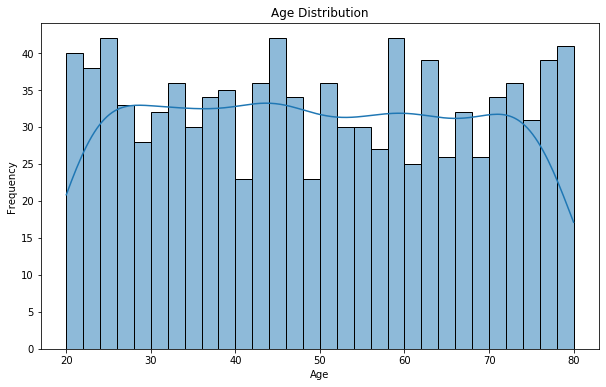

In [20]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age shows a roughly normal distribution, centered around 49 years

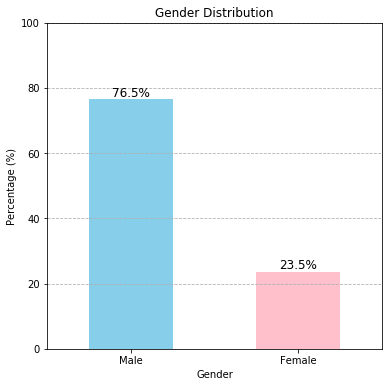

In [21]:
# Distribution of Gender

# Calculate the percentages
gender_bar = df['gender'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(6, 6))
gender_bar.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 100) # Set y-axis range for percentage clarity

# Display the percentage value above each bar
for i, percentage in enumerate(gender_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

Gender distribution shows approximately 76.5% male and 23.5% female patients

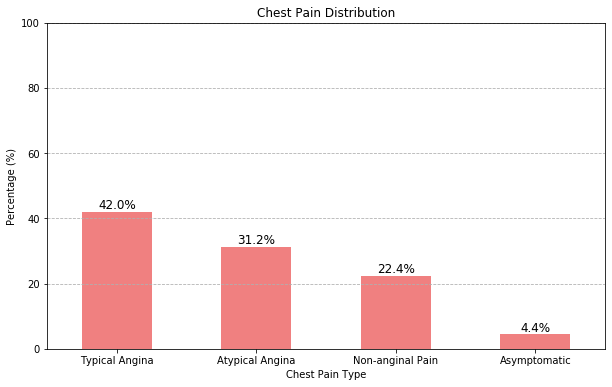

In [22]:
# Distribution of Chest Pain

# Calculate the percentages
chestpain_bar = df['chestpain'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
chestpain_bar.plot(kind='bar', color='lightcoral')
plt.title("Chest Pain Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Percentage (%)")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"],
    rotation=0)
plt.ylim(0, 100) # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--')


# Display the percentage value above each bar
for i, percentage in enumerate(chestpain_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

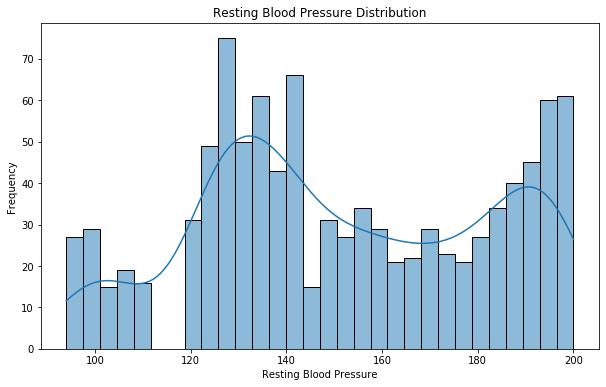

In [23]:
# Distribution of Resting Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df['restingBP'], bins=30, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()

Resting Blood Pressure: Right-skewed distribution, majority between 120-180 mmHg

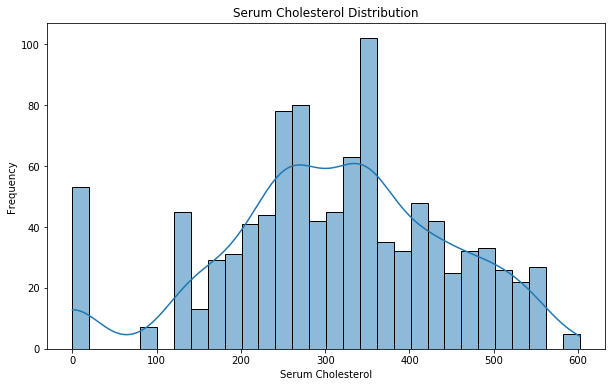

In [24]:
# Distribution of Serum Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['serumcholestrol'], bins=30, kde=True)
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.show()

Serum cholesterol, also known as total cholesterol (TC), is a measure of the total amount of cholesterol in your blood, including both good and bad cholesterol.

- According to dataset description, the distribution of serum cholestrol is 126-564 ( in mg/dl). Values below and above this range are probably outliers.

- Serum Cholesterol: Some outliers present, main distribution between 200-400 mg/dl


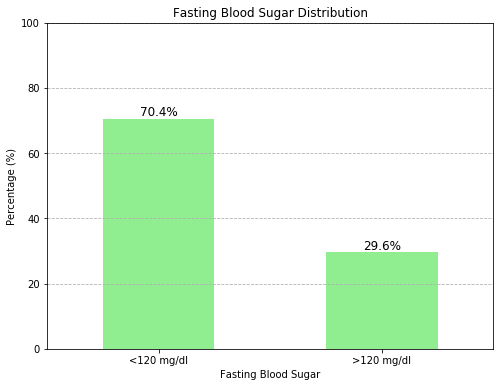

In [25]:
# Distrubution of Fasting Blood Sugar

# Calculate the percentages
fastingbs_bar = df['fastingbloodsugar'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
fastingbs_bar.plot(kind='bar', color='lightgreen')
plt.title("Fasting Blood Sugar Distribution")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1], labels=["<120 mg/dl", ">120 mg/dl"], rotation=0)
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--')

# Display the percentage value above each bar
for i, percentage in enumerate(fastingbs_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

Fasting Blood Sugar: Binary feature, about 30% have levels >120 mg/dl

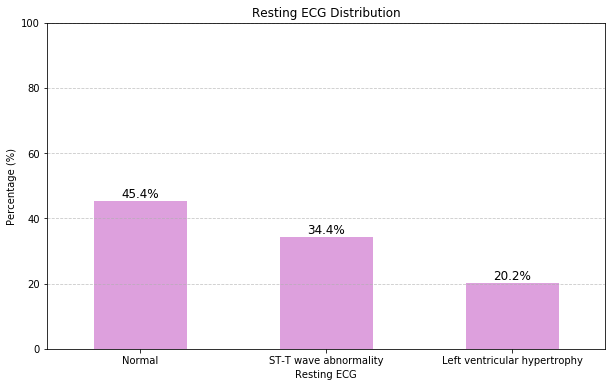

In [26]:
# Distribution of Resting ECG

# Calculate the percentages
ecg_bar = df['restingrelectro'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
ecg_bar.plot(kind='bar', color='plum')
plt.title("Resting ECG Distribution")
plt.xlabel("Resting ECG")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1, 2],labels=["Normal", "ST-T wave abnormality", "Left ventricular hypertrophy"],rotation=0,)
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentage value above each bar
for i, percentage in enumerate(ecg_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

A resting electrocardiogram (ECG) is a non-invasive test that measures the electrical activity of your heart while you are at rest
- Resting ECG: Three categories with normal ECG being most common

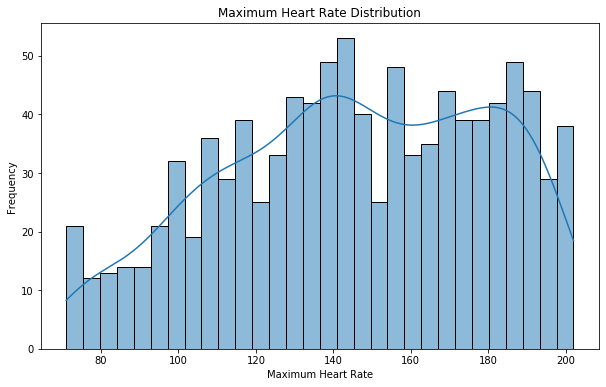

In [27]:
# Distribution of Maximum Heart Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['maxheartrate'], bins=30, kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

Maximum Heart Rate: Roughly normal distribution between 70-200 bpm

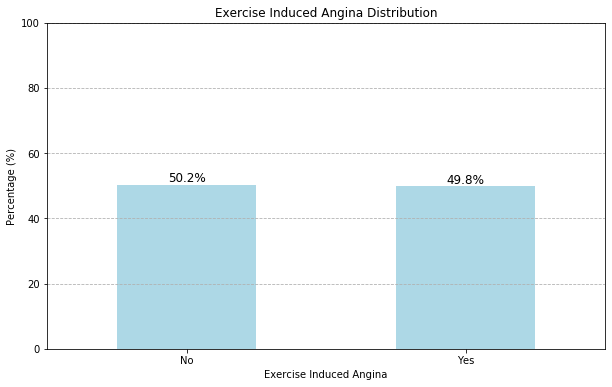

In [28]:
# Distribution of Exercise Induced Angina

# Calculate the percentages
angina_bar = df['exerciseangia'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
angina_bar.plot(kind='bar', color='lightblue')
plt.title("Exercise Induced Angina Distribution")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--',)

# Display the percentage value above each bar
for i, percentage in enumerate(angina_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()


Exercise-induced angina is chest pain that occurs during physical activity and is a warning sign of heart disease
- Exercise Induced Angina: Nearly equal split between yes/no

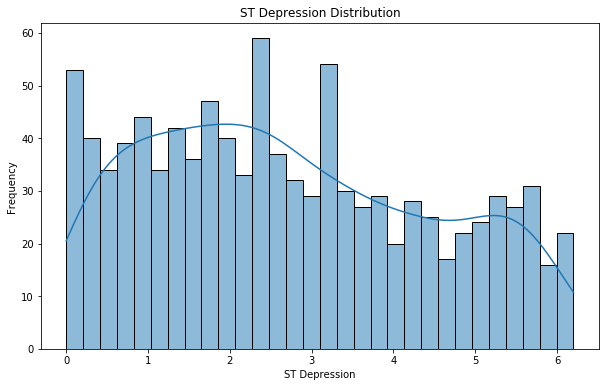

In [29]:
# Distribution of ST Depression 
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.title('ST Depression Distribution')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.show()

ST depression is an electrocardiogram (ECG) finding that indicates an underlying heart condition
- ST Depression (oldpeak): Right-skewed distribution

In [30]:
df['slope'].value_counts()

2    322
1    299
3    199
0    180
Name: slope, dtype: int64

Dataset description does not mention Slope of the peak exercise ST segment value of 0, so we will replace 0 values with the its nearest neighbour values

In [31]:
# Replace 0 values in slope with nearest neighbour
df['slope'] = df['slope'].replace(0, method='ffill')

In [32]:
df['slope']

0      3
1      1
2      1
3      2
4      3
      ..
995    2
996    1
997    3
998    3
999    3
Name: slope, Length: 1000, dtype: int64

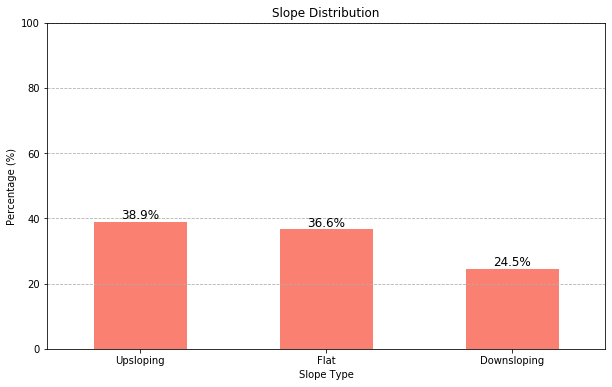

In [33]:
# Distribution of Slope of Peak Exercise ST Segment

# Calculate the percentages
slope_bar = df['slope'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
slope_bar.plot(kind='bar', color='salmon')
plt.title("Slope Distribution")
plt.xlabel("Slope Type")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1, 2], labels=["Upsloping", "Flat", "Downsloping"], rotation=0)
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--')

# Display the percentage value above each bar
for i, percentage in enumerate(slope_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

The slope of the ST segment during peak exercise can be upsloping, flat, or downsloping. The slope is the shift in the ST segment relative to the increase in heart rate during exercise. The slope of the ST segment can help predict the severity of coronary artery disease
- Slope of ST Segment: Three categories with upsloping being most common

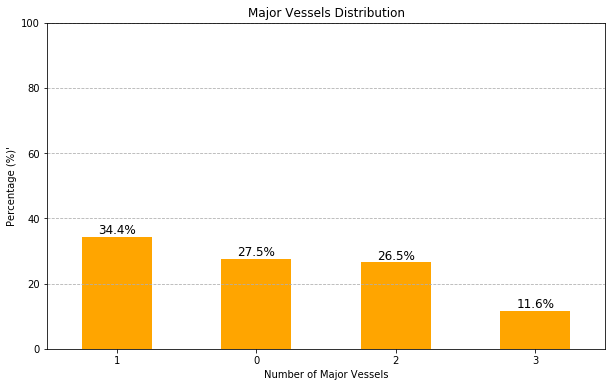

In [34]:
# Distribution of Number of Major Vessels

# Calculate the percentages
vessels_bar = df['noofmajorvessels'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
vessels_bar.plot(kind='bar', color='orange')
plt.title("Major Vessels Distribution")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Percentage (%)'")
plt.xticks(rotation=0)  
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--')

# Display the percentage value above each bar
for i, percentage in enumerate(vessels_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

Number of Major Vessels: Ranges from 0-3, with decreasing frequency

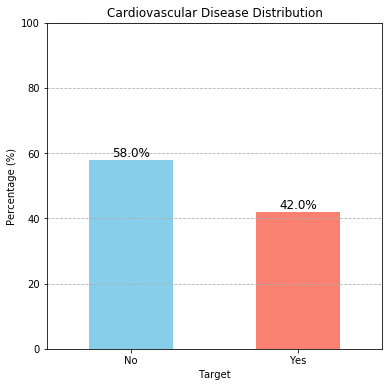

In [35]:
# Distribution of Target Variable

# Calculate the percentages
target_bar = df['target'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
target_bar.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Cardiovascular Disease Distribution")
plt.xlabel("Target")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.ylim(0, 100)  # Set y-axis range for percentage clarity
plt.grid(axis='y', linestyle='--')

# Display the percentage value above each bar
for i, percentage in enumerate(target_bar):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)
plt.show()

Slightly imbalanced dataset: 58% positive cases (with heart disease)
This imbalance isn't severe enough to require special handling

### Bivariate Analysis

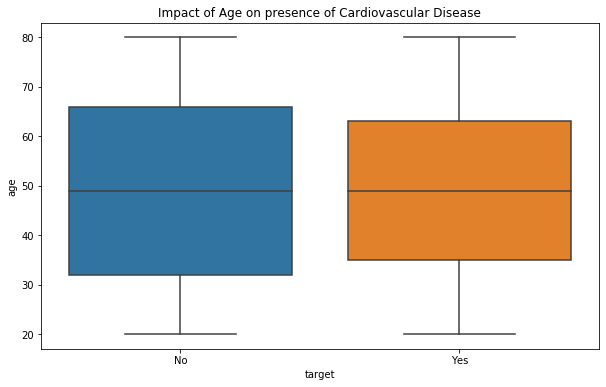

In [36]:
# Impact of Age on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='age', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of Age on presence of Cardiovascular Disease')
plt.show()

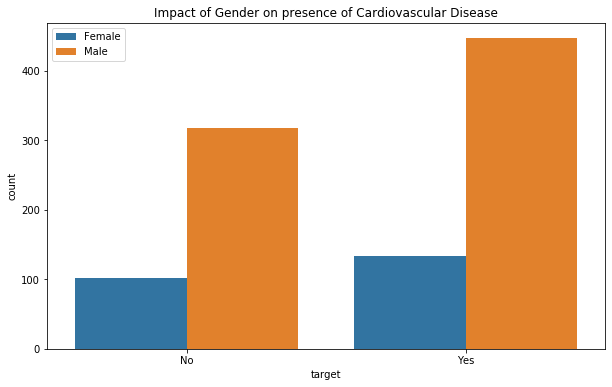

In [37]:
# Impact of Gender on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="gender")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['Female', 'Male'])
plt.title('Impact of Gender on presence of Cardiovascular Disease')
plt.show()

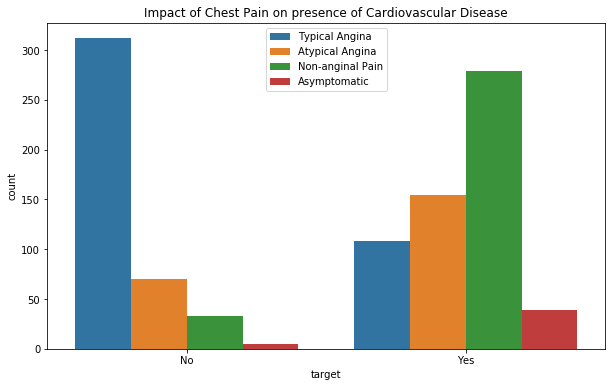

In [38]:
# Impact of Chest Pain on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="chestpain")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.title('Impact of Chest Pain on presence of Cardiovascular Disease')
plt.show()

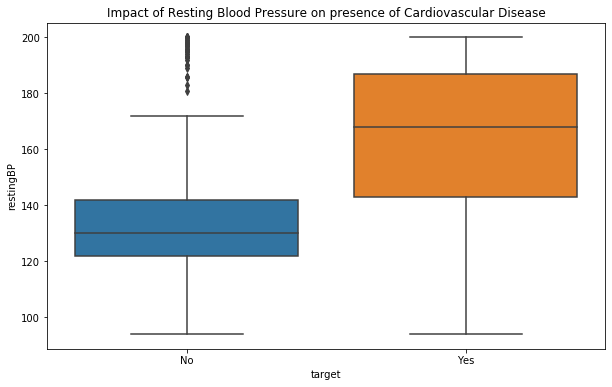

In [39]:
# Impact of Resting Blood Pressure on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='restingBP', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of Resting Blood Pressure on presence of Cardiovascular Disease')
plt.show()

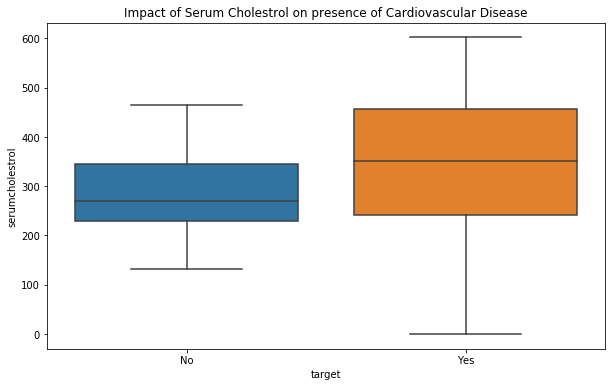

In [40]:
# Impact of Serum Cholestrol on Presence of Cardiovascular disease
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='serumcholestrol', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of Serum Cholestrol on presence of Cardiovascular Disease')
plt.show()

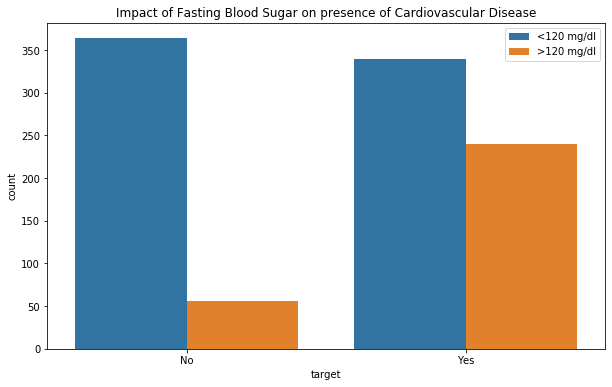

In [41]:
# Impact of Fasting Blood Sugar on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="fastingbloodsugar")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['<120 mg/dl', '>120 mg/dl'])
plt.title('Impact of Fasting Blood Sugar on presence of Cardiovascular Disease')
plt.show()

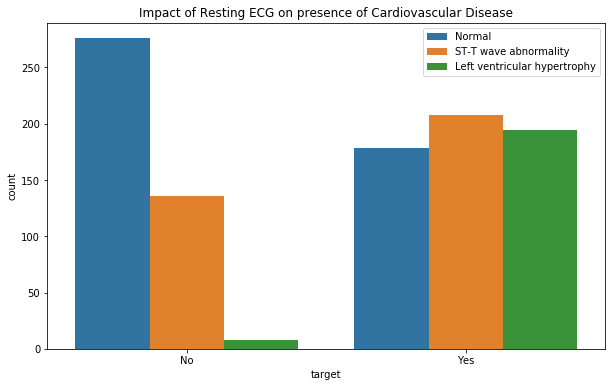

In [42]:
# Impact of Resting ECG on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="restingrelectro")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'])
plt.title('Impact of Resting ECG on presence of Cardiovascular Disease')
plt.show()

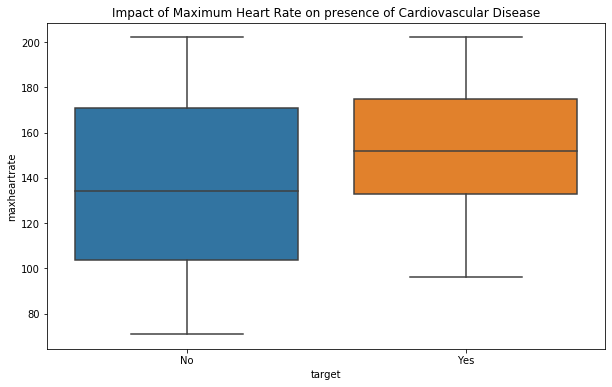

In [43]:
# Impact of Max Heart Rate on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='maxheartrate', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of Maximum Heart Rate on presence of Cardiovascular Disease')
plt.show()

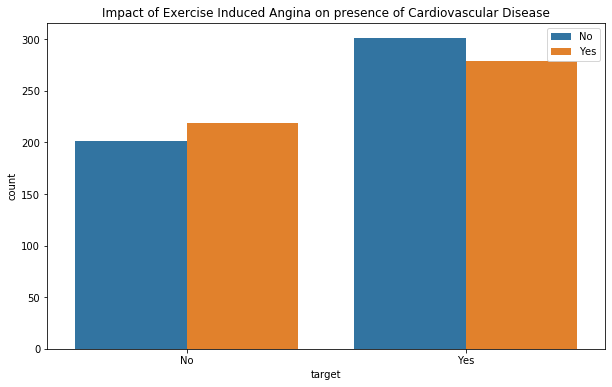

In [44]:
# Impact of Exercise Induced Angina on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="exerciseangia")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['No', 'Yes'])
plt.title('Impact of Exercise Induced Angina on presence of Cardiovascular Disease')
plt.show()

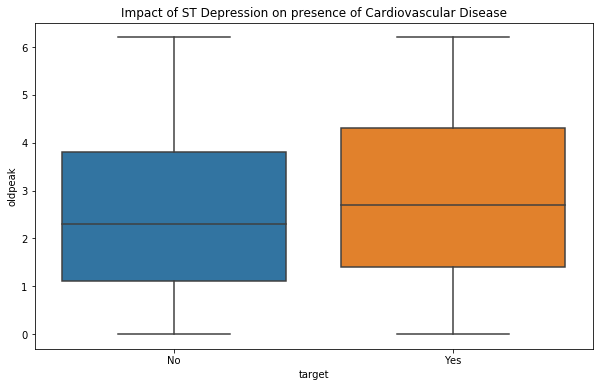

In [45]:
# Impact of ST Depression on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of ST Depression on presence of Cardiovascular Disease')
plt.show()

ST depression on an electrocardiogram (ECG) typically indicates a potential issue with blood flow to the heart muscle, often signifying myocardial ischemia (reduced blood supply to the heart), which can be a sign of coronary artery disease and could potentially lead to a heart attack if left untreated

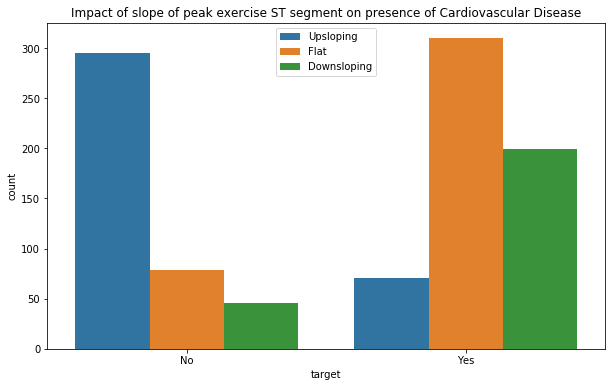

In [46]:
# Impact of Slope of Peak Exercise ST Segment on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="slope")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(labels=['Upsloping', 'Flat', 'Downsloping'])
plt.title('Impact of slope of peak exercise ST segment on presence of Cardiovascular Disease')
plt.show()

The slope of the ST segment during peak exercise can be upsloping, flat, or downsloping. The slope is the shift in the ST segment relative to the increase in heart rate during exercise. The slope of the ST segment can help predict the severity of coronary artery disease. 

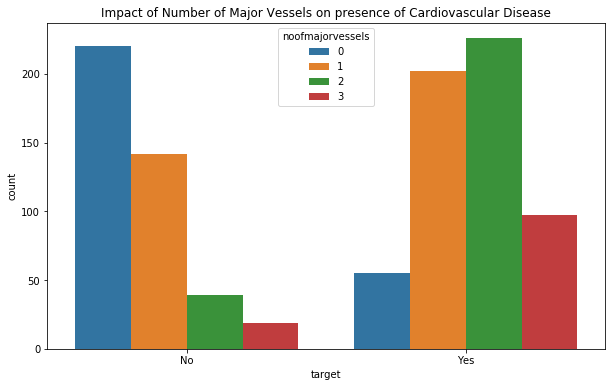

In [47]:
# Impact of Number of Major Vessels on Presence of Cardiovascular Disease
plt.figure(figsize=(10,6))
sns.countplot(df, x="target", hue="noofmajorvessels")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Impact of Number of Major Vessels on presence of Cardiovascular Disease')
plt.show()

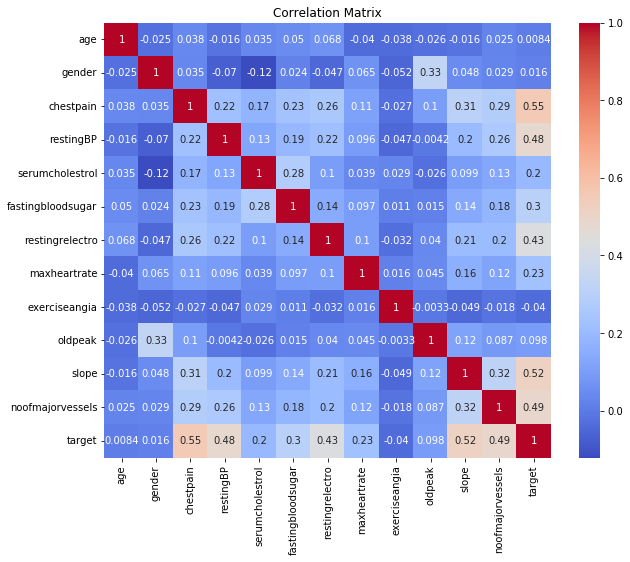

In [48]:
# Calculate Correlation Matrix
corr = df.drop(['patientid'], axis = 1).corr() #patientid is not necessary

# Plot Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [49]:
# Handle Outliers as per EDA
df["serumcholestrol"] = df["serumcholestrol"].apply(
    lambda x: np.nan if x < 126 or x > 564 else x
)
df["serumcholestrol"].fillna(df["serumcholestrol"].median(), inplace=True)

In [50]:
# Separate Features and Target
X = df.drop("target", axis=1)
y = df["target"]

In [51]:
X

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,103368,53,1,2,171,327.0,0,1,147,0,5.3,3,3
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2
4,146211,31,1,1,199,327.0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349.0,0,2,183,1,5.6,2,2
996,9953423,47,1,3,143,258.0,1,1,98,1,5.7,1,0
997,9965859,69,1,0,156,434.0,1,0,196,0,1.4,3,1
998,9988507,45,1,1,186,417.0,0,1,117,1,5.9,3,2


In [52]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64

In [53]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

In [55]:
# Model Training and Evaluation with Hyperparameter Tuning
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [56]:
# Define Hyperparameter Grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"],
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto"],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"],
    },
}

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        83
           1       0.96      0.94      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200

AUC ROC Score: 0.9459890845433014


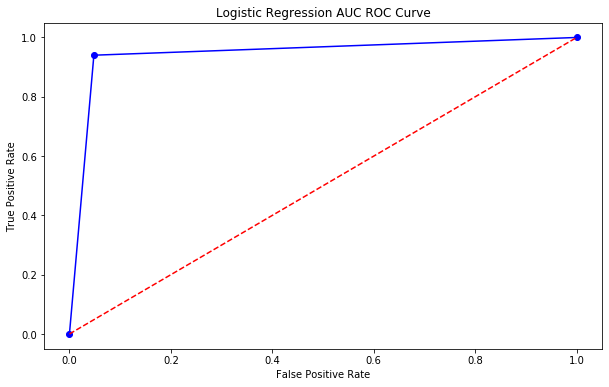

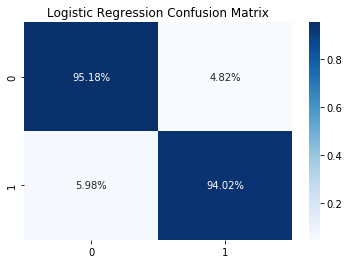

Model: SVM
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        83
           1       0.98      0.94      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

AUC ROC Score: 0.9580372773143858


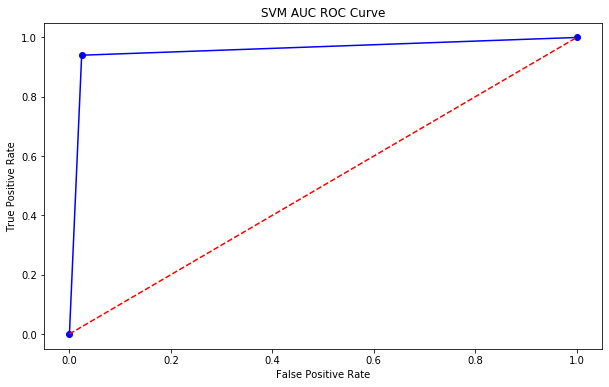

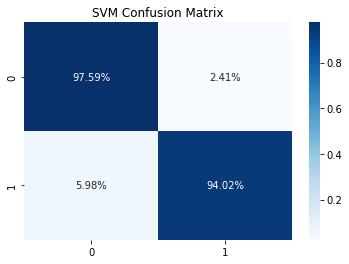

Model: KNN
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.96      0.93      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

AUC ROC Score: 0.935691483884255


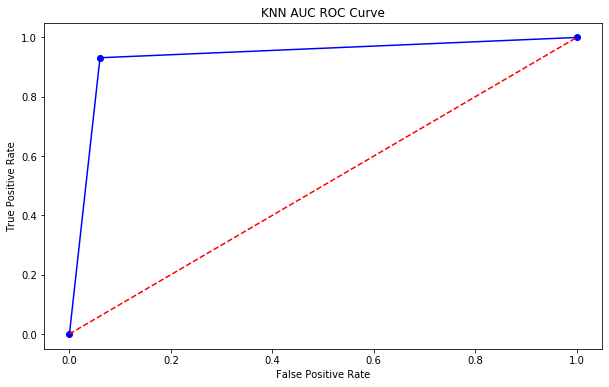

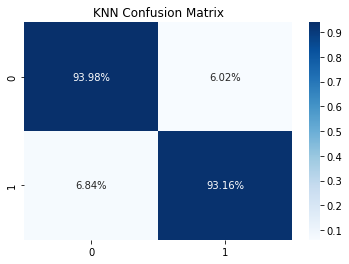

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        83
           1       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

AUC ROC Score: 0.9442384924312636


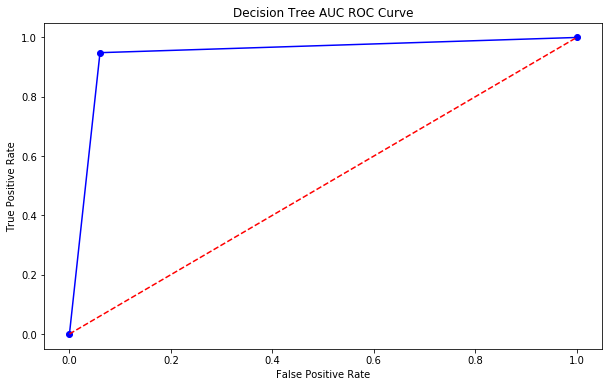

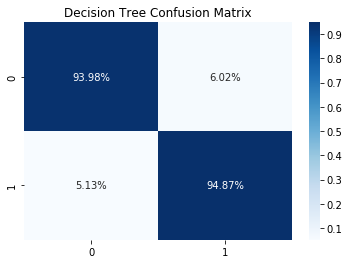

Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

AUC ROC Score: 0.9751312944084028


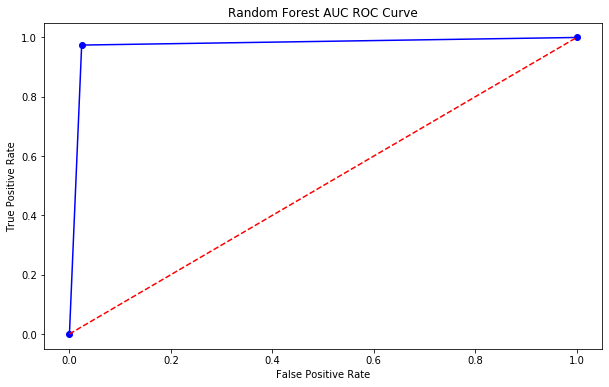

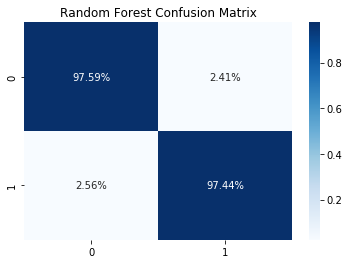

In [57]:
# Fit Models with GridSearchCV
best_models = {}

for model_name, model in models.items():
    # Grid search with cross-validation
    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy")
    # Fit the model
    grid.fit(X_train, y_train)
    # Save the best model
    best_models[model_name] = grid.best_estimator_
    # Evaluate the model
    y_pred = grid.predict(X_test)
    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    # calculate AUC ROC score
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f"AUC ROC Score: {auc_roc}")
    # plot AUC ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker="o", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")
    plt.title(f"{model_name} AUC ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize="true")
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

In [58]:
# Neural Network Model
nn_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [59]:
# Compile with Additional Metrics
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

In [60]:
# Train the model with Early Stopping
history = nn_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/100
23/23 [==============================] - 3s 29ms/step - loss: 0.6145 - accuracy: 0.6875 - val_loss: 0.5052 - val_accuracy: 0.8125
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.8458 - val_loss: 0.3474 - val_accuracy: 0.9000
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3157 - accuracy: 0.8889 - val_loss: 0.3092 - val_accuracy: 0.9125
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2762 - accuracy: 0.8917 - val_loss: 0.2924 - val_accuracy: 0.9250
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2601 - accuracy: 0.8986 - val_loss: 0.3083 - val_accuracy: 0.9250
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2709 - accuracy: 0.9000 - val_loss: 0.2992 - val_accuracy: 0.9250
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2337 - accuracy: 0.9042 - val_loss: 0.2963 - val_accuracy: 0.9250
Epoch 8/100


7/7 [==============================] - 0s 3ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        83
           1       0.98      0.95      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



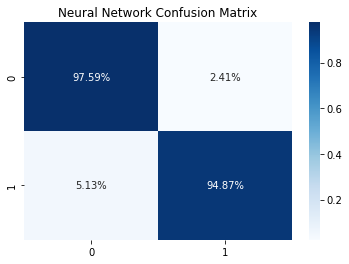

In [61]:
# Evaluate Neural Network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
cm_nn = confusion_matrix(y_test, y_pred_nn, normalize="true")
sns.heatmap(cm_nn, annot=True, fmt=".2%", cmap="Blues")
plt.title("Neural Network Confusion Matrix")
plt.show()

AUC ROC Score: 0.9623107815878901


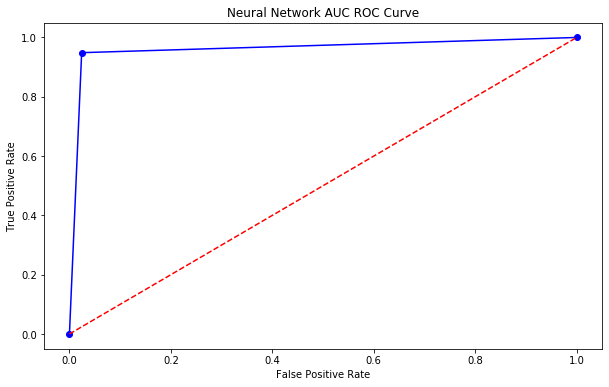

In [62]:
# Calculate AUC ROC score for Neural Network
auc_roc_nn = roc_auc_score(y_test, y_pred_nn)
print(f"AUC ROC Score: {auc_roc_nn}")

# plot AUC ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, marker="o", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("Neural Network AUC ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

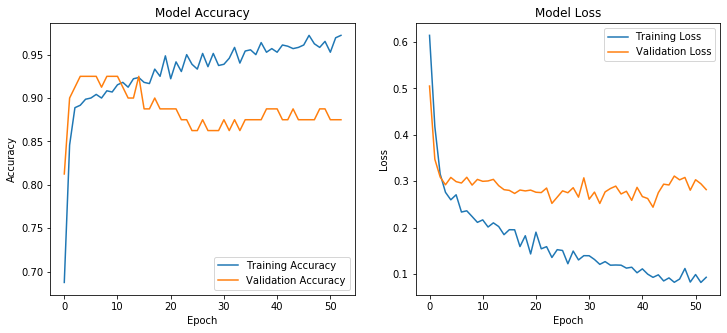

In [63]:
# Plotting Accuracy and Loss curves
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()